# Heart Disease

## Intro

This data set 

data source : https://archive.ics.uci.edu/dataset/45/heart+disease

Let's import the necessary libraries for this data and load the data:

In [190]:
import pandas as pd
import matplotlib.pyplot as mplot
import seaborn as sb
import numpy as np

heart_data = pd.read_csv('heart_disease_data.csv')

Here is an overview of the data:

In [191]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


We will use diagnosis as the variable we want to predict. There will be relationships between most of the variables listed above and whether or not the patient has got heart disease. We're going to explore the variables and attempt to replicate the distribution of the data in relation to diagnosis.

These are the descriptions of our attributes:
- **AGE:** in years
- **SEX:** 1 = male, 0 = female
- **CP:** Chest pain
  - 1 = Typical angina
  - 2 = Atypical angina
  - 3 = Non-anginal pain
   - 4 = Asymptomatic
- **TRSETBPS :** Resting blood pressure (in mg Hg on admission to the hospital)
- **CHOL :** serum cholesterol in mg/dL
- **FBS :** (fasting blood sugar > 120 mg/dL) (1 = true; 0 = false)
- **RESTECG :** resting electrocardiographic results
- **THALACH :** maximum heart rate achieved
- **EXANG :** exercise-induced angina (1 = yes; 0 = no)
- **OLDPEAK :** ST depression induced by exercise relative to rest
- **SLOPE :** the slope of the peak exercise ST segment
  - 1 = upsloping
  - 2 = flat
  - 3 = downsloping
- **CA :** number of major vessels (0-3) colored by fluoroscopy
- **THAL :** 3 = normal; 6 = fixed defect; 7 = reversible defect
- **DIAGNOSIS :** 1 = yes , 0 = no



Let's now check for any null values in data before we do analysis:

In [192]:
heart_data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
diagnosis    0
dtype: int64

We can see the data has no null values. Now we can also take a look at some statistics of the data:


In [193]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.464646
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499590
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


## Analysis of variables

### Age

Let's see how age is distributed in our dataset:

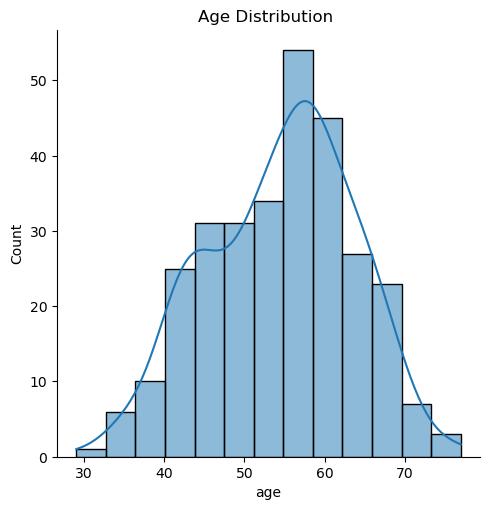

In [194]:
sb.displot(heart_data, x="age", kde=True) 
mplot.title("Age Distribution ")
mplot.show()

This tells us the age distribution of all patients are between approx 35 and 75 years old. Age seems to be normally distributed alpng with the some outliers for under 30 years old and over 75 years old.

Now, let's try to generate a normal age distribution. Earlier we looked at the stats of our dataset and they showed us an averagre age of 55 and a standard distribution of 9. 



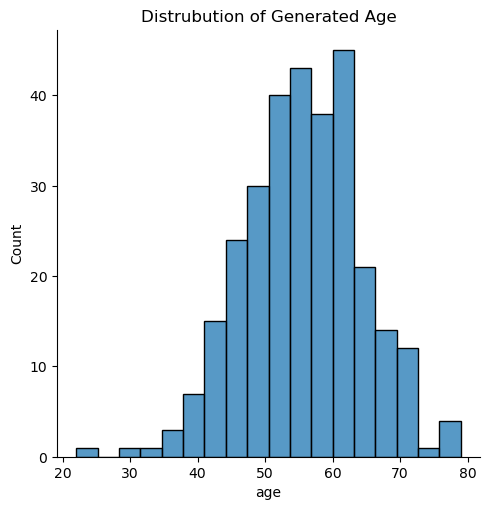

In [195]:
# Set a seed to ensure consistency in generating data
np.random.seed(6)

gen_data = pd.DataFrame(columns=['age','diagnosis'])

# We will generate 300 data points which is similar total to existing dataset
generate_age = np.random.normal(55,9,300)

# we want to round age for plotting
gen_data['age'] = generate_age.round(0)

sb.displot(gen_data['age'])
mplot.title("Distrubution of Generated Age")
mplot.show()


Both the plots from actual dataset and generated dataset have a similar age distribution.

### Diagnosis

We will look at it the breakdown of diagnosis, interms of who has heart disease vs who does not.

c:\Users\frank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


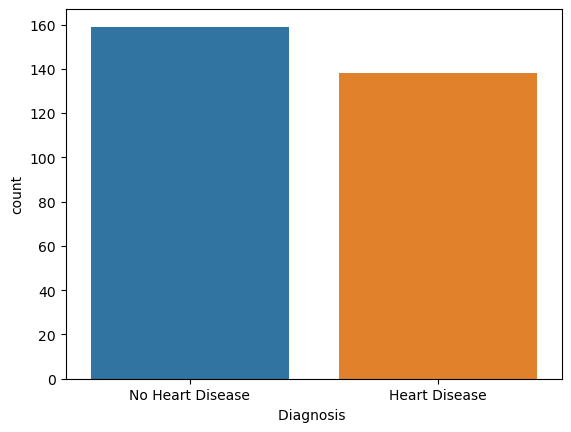

In [196]:
sb.countplot(heart_data['diagnosis'])
mplot.xlabel("Diagnosis ") 
bars = ('No Heart Disease', 'Heart Disease')
y_position = np.arange(len(bars))
mplot.xticks(y_position, bars)

mplot.show()

The data shows approx 50/50 which can lead to an issue whereby a 35 year old could have same chance as 75 year old to have heart disaease but the we data shows that the older you are the more likely you are to get heart disease so let's break down the data by age.

In [197]:
def age_breakdown(age):
    if age < 35:
        return 'Very Young'
    elif 35 <= age < 40:
        return 'Somwhat Young'
    elif 40 <= age < 45:
        return 'Young'
    elif 45 <= age < 55:
        return 'Middle Age'
    else:
        return 'Old'

heart_data['age'] = heart_data.age.apply(age_breakdown)

c:\Users\frank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


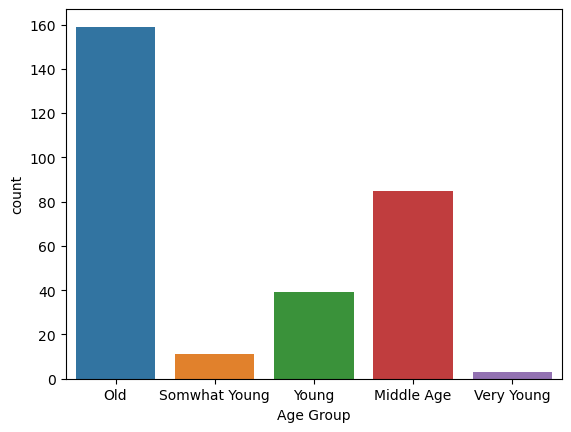

In [198]:
sb.countplot(heart_data['age'])
mplot.xlabel("Age Group")
mplot.show()

We can the older age group is higher the than the younger aged ones. The older aged ones are the biggest category. Now, let's see what the effect age will have on diagnosis .

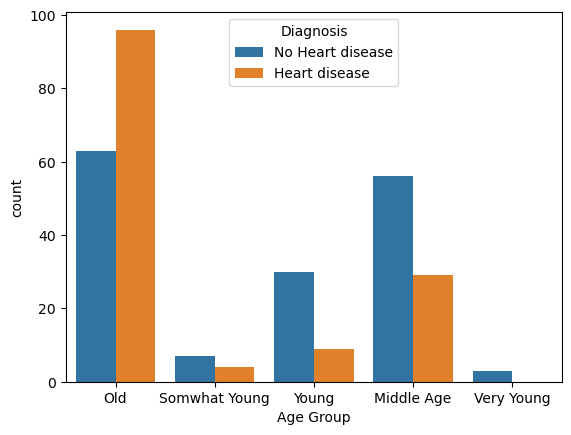

In [199]:
sb.countplot( x = "age", data = heart_data, hue ='diagnosis')
mplot.xlabel("Age Group")
mplot.legend(title='Diagnosis', labels=['No Heart disease','Heart disease'])
mplot.show()

As expected, we see as age increases so does the probablilty of having heart disease increases.

In [200]:
#Get exact counts for age categories to calculate probablites
print(heart_data.groupby(["age","diagnosis"])["diagnosis"].count().unstack())


diagnosis         0     1
age                      
Middle Age     56.0  29.0
Old            63.0  96.0
Somwhat Young   7.0   4.0
Very Young      3.0   NaN
Young          30.0   9.0


In [209]:
def get_age_category(x):
    if x < 35:
        return 'Very Young'
    elif 35 <= x < 40:
        return 'Somewhat Young'
    elif 40 <= x < 45:
        return 'Young'
    elif 45 <= x < 55:
        return 'Middle'
    else:
        return 'Older'

gen_data['age'] = gen_data.age.apply(get_age_category)

In [216]:
def get_diag(age):
    diag = [0, 1]
    if age == 'Very Young':
        choice = np.random.choice(diag, 1, p=[0.99, 0.01])
        listToStr = ' '.join(map(str, choice)) 
        return listToStr
    elif  age == 'Somewhat Young':
        choice = np.random.choice(diag, 1, p=[0.64, 0.36])
        listToStr = ' '.join(map(str, choice)) 
        return listToStr
    elif age == 'Young':
        choice = np.random.choice(diag, 1, p=[0.77, 0.23])
        listToStr = ' '.join(map(str, choice)) 
        return listToStr
    elif age == 'Middle':
        choice = np.random.choice(diag, 1, p=[0.66, 0.34])
        listToStr = ' '.join(map(str, choice)) 
        return listToStr
    else:
        choice = np.random.choice(diag, 1, p=[0.40, 0.60])
        listToStr = ' '.join(map(str, choice)) 
        return listToStr

gen_data['diagnosis'] = gen_data.age.apply(get_diag)

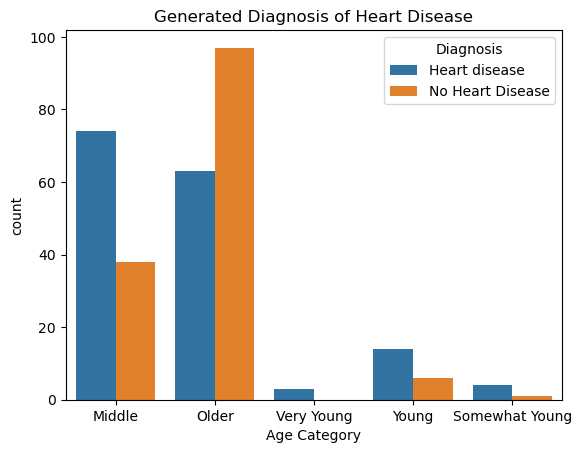

In [217]:
sb.countplot(x="age",data=gen_data,hue="diagnosis")
mplot.title("Generated Diagnosis of Heart Disease")
mplot.xlabel("Age Category")
mplot.legend(title='Diagnosis', labels=['Heart disease','No Heart Disease'])
mplot.show()

We see that the generated data closely resembles the actual data for diagnosis per age. Finally let's look at the generated data's overall diagnosis.

c:\Users\frank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


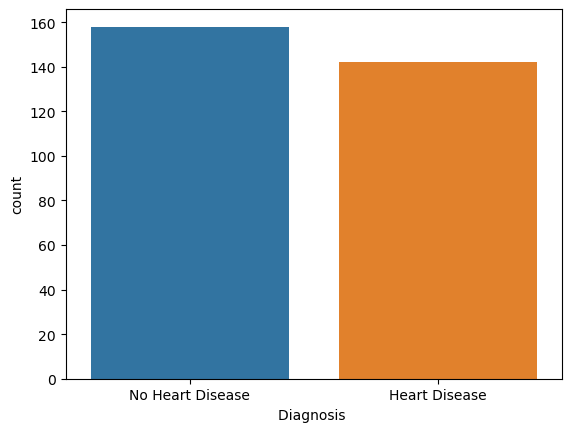

In [218]:
sb.countplot(gen_data['diagnosis'])
mplot.xlabel("Diagnosis ") 
bars = ('No Heart Disease', 'Heart Disease')
y_position = np.arange(len(bars))
mplot.xticks(y_position, bars)

mplot.show()

Again, we can see it's very similar to actual data.

### Sex

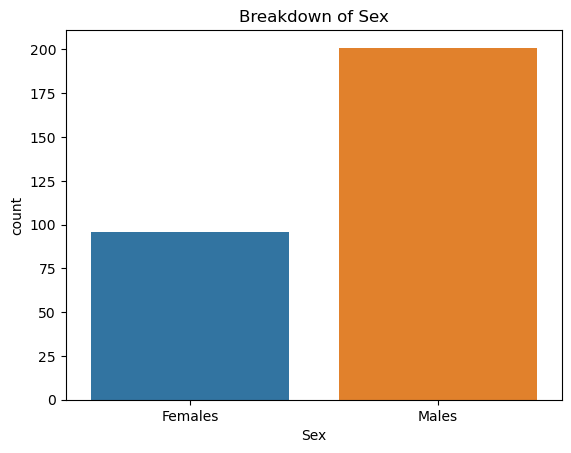

In [ ]:
sb.countplot(x="sex",data=heart_data)
mplot.title("Breakdown of Sex")
mplot.xlabel("Sex")
bars = ('Females', 'Males')
y_position = np.arange(len(bars))
mplot.xticks(y_position, bars)
mplot.show()

It seems there is approx double the amount of males to females. This makes the ratio of male:female in the dataset 2:1. Now, let's invesigate this in relation to the diagnosis.

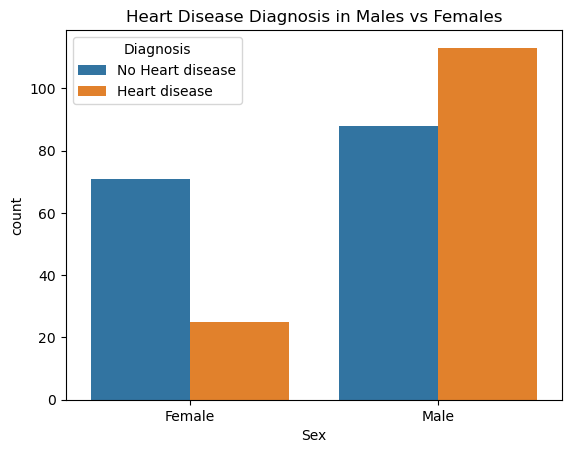

In [ ]:
sb.countplot(x="sex",data=heart_data,hue="diagnosis")
mplot.title("Heart Disease Diagnosis in Males vs Females")
mplot.xlabel("Sex")
bars = ('Female', 'Male')
y_position = np.arange(len(bars))
mplot.xticks(y_position, bars)
mplot.legend(title='Diagnosis', labels=['No Heart disease','Heart disease'])
mplot.show()

The data very clearly  shows us that heart disease is far more likely to occur in males patients than female patients. Next, we will try to plot this trend in a generated data set.